In [ ]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


=== Data Head ===
  ActivitySiteID      ActivityDescription BookingStartTime  MaxBookees  \
0            HXP  20-20-20  2.45pm-3.45pm         14:45:00   -0.475775   
1            HXP  20-20-20  2.45pm-3.45pm         14:45:00   -0.475775   
2            HXP  20-20-20  2.45pm-3.45pm         14:45:00   -0.475775   
3            HXP  20-20-20  2.45pm-3.45pm         14:45:00   -0.475775   
4            HXP  20-20-20  2.45pm-3.45pm         14:45:00   -0.475775   

   Number_Booked  Price_INR BookingEndDateTime  DynamicPrice  
0      -0.535512  -1.709436         08-04-2018         -2.26  
1      -0.219810  -1.709436         15-04-2018         -1.69  
2      -0.325044  -1.709436         22-04-2018         -1.88  
3      -0.851213  -1.709436         29-04-2018         -2.26  
4      -1.061680  -1.709436         06-05-2018         -2.26  

=== Data Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3289 entries, 0 to 3288
Data columns (total 8 columns):
 #   Column               Non-Null

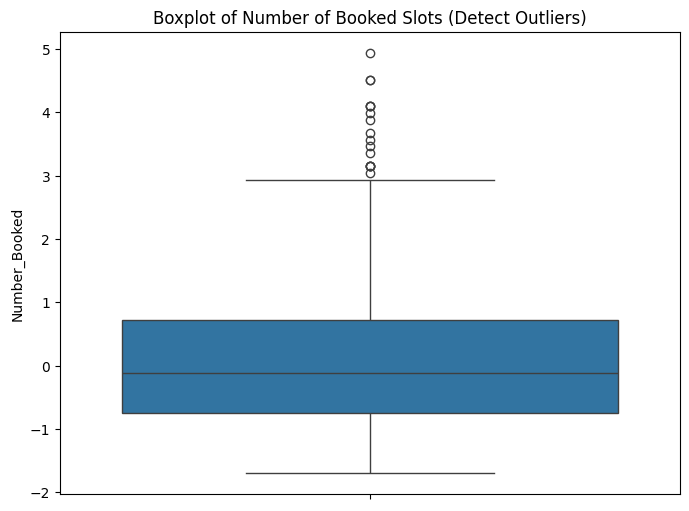

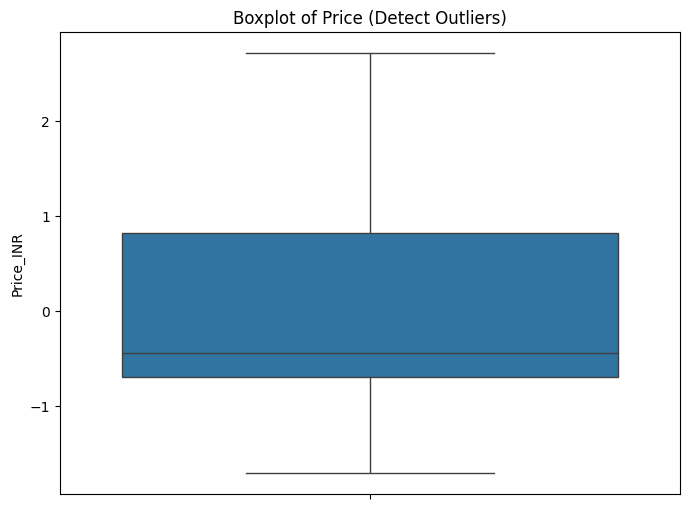

In [7]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Step 1: Load Cleaned Data
file_path = '/content/drive/My Drive/CultFit_Project/Cleaned_Classes_April_June_final.csv'
df = pd.read_csv(file_path)

# Step 2: Data Overview
print("=== Data Head ===")
print(df.head())
print("\n=== Data Info ===")
print(df.info())
print("\n=== Descriptive Statistics ===")
print(df.describe())

# Step 3: Convert Date Column
df['Date'] = pd.to_datetime(df['BookingEndDateTime'], errors='coerce')

# Step 4: Booking Trend Over Time (Interactive Plot)
fig = px.line(df, x='Date', y='Number_Booked', title='Interactive Booking Trend Over Time')
fig.update_layout(xaxis_title='Date', yaxis_title='Number of Booked Slots')
fig.show()

# Step 5: Seasonal Patterns by Month (Boxplot)
df['Month'] = df['Date'].dt.month
fig = px.box(df, x='Month', y='Number_Booked', title='Monthly Booking Distribution')
fig.update_traces(marker_color='green')
fig.show()

# Step 6: High-Demand Classes (Histogram)
fig = px.histogram(df, x='ActivityDescription', title='High-Demand Classes Distribution')
fig.update_layout(bargap=0.2)
fig.show()

# Step 7: Statistical Analysis – Outliers & Anomalies
plt.figure(figsize=(8,6))
sns.boxplot(y='Number_Booked', data=df)
plt.title('Boxplot of Number of Booked Slots (Detect Outliers)')
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(y='Price_INR', data=df)
plt.title('Boxplot of Price (Detect Outliers)')
plt.show()